#Ambrose Desmond MSC_DA_CA2

## Irelands Dairy sector analysis compared to the top EU producer and global producers.

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import statistics as stats
from scipy.stats import poisson
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import warnings
from sklearn.feature_selection import RFE
import json
import requests
import time
# from faker import Factory,Faker
warnings.filterwarnings('ignore') # supress warnings

In [51]:
# Import the dairy csv as ddf
ddf = pd.read_csv("Intake of Cows Milk by Creameries and Pasteurisers.csv")

In [52]:
ddf.shape

(575, 4)

In [53]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575 entries, 0 to 574
Data columns (total 4 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Unnamed: 0                                          575 non-null    object 
 1   Intake of Cows Milk by Creameries and Pasteurisers  574 non-null    object 
 2   Fat Content                                         514 non-null    float64
 3   Protein Content                                     514 non-null    float64
dtypes: float64(2), object(2)
memory usage: 18.1+ KB


In [54]:
ddf.head()

,Unnamed: 0,Intake of Cows Milk by Creameries and Pasteurisers,Fat Content,Protein Content
0,"Source: Central Statistics Office, Ireland.",NaN,NaN,NaN
1,1975 January,55.8,NaN,NaN
2,1975 February,84.4,NaN,NaN
3,1975 March,193.3,NaN,NaN
4,1975 April,327.5,NaN,NaN


In [56]:
# need to drop the first row as its not part of the actual data.
ddf.drop(index=ddf.index[0], axis=0, inplace=True)
# alternativaly i could have used ddf.iloc[1:] to select everything except the first row and 
# and store it in a new dataframe. here I chose to use the drop() function with index 0 ( ie first line) the axis 0 indicates row
# and inplace = true performs the operation to the existing  dataframe. I chose this because It saves space to 
# edit the existing dataframe instead of creating new ones which the other methods do.

In [57]:
# formatt the data to give concise and meaningfull headings to the dataframe,
# I did this because it will make reading the dataframe easier for myself and other people looking at it

ddf.columns = ['date','milk','fat','pro']
ddf.head()

,date,milk,fat,pro
1,1975 January,55.8,NaN,NaN
2,1975 February,84.4,NaN,NaN
3,1975 March,193.3,NaN,NaN
4,1975 April,327.5,NaN,NaN
5,1975 May,493.5,NaN,NaN


In [63]:
#I want to convert date string  colum to datetime object because datetime objects are easier to manipulate
# espicallyif the date is in the index. there is dedicated functionality with date time objects.
ddf[["date"]] = ddf[["date"]].apply(pd.to_datetime)
# my .info() on the dataframe revealed the milk colum is type object. I want to converted this to float type 
# because this data type is best interpertiped numerically for manipulation in charts and models.
#  My inital attempt of ddf['milk'] = ddf['milk'].astype(float)
# got an error trying to convert str to float ValueError: could not convert string to float: '1,072.2'
# the problem here is the comma seperasting thousands , need to strip these out and try again.
# Im using a lambda function on the milk column to strip the comma .
# I chose to use lambda because its a singl euse function that saves time and space v writing a dedicated function.
ddf['milk'] = ddf['milk'].apply(lambda x : x.replace(',',''))
ddf['milk'] = ddf['milk'].astype(float)

,date,milk,fat,pro
1,1975-01-01,55.8,NaN,NaN
2,1975-02-01,84.4,NaN,NaN
3,1975-03-01,193.3,NaN,NaN
4,1975-04-01,327.5,NaN,NaN
5,1975-05-01,493.5,NaN,NaN


In [64]:
# Selecting the last 10 years of data.This will conviently remove the dates where fat and pro data
# was not being collected.

ddfd = ddf[(ddf['date'] >= '2012-01-01')]
ddfd.tail()

,date,milk,fat,pro
570,2022-06-01,1057.60,4.00,3.47
571,2022-07-01,1022.80,4.03,3.47
572,2022-08-01,919.01,4.21,3.53
573,2022-09-01,785.62,4.56,3.75
574,2022-10-01,698.49,4.81,3.97


In [66]:
# Checking data for any nan values , shows none. I did this because nan values have detrimental effecrts on 
# models 
ddfd.isna().sum() 

date    0
milk    0
fat     0
pro     0
dtype: int64

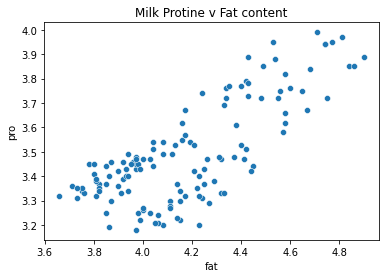

In [69]:
sns.scatterplot(data=ddfd, x= 'fat', y='pro').set(title = 'Milk Protine v Fat content')
plt.show()
# plt.savefig("ff_IN_OUT_scatter1.png", dpi=300)
# There are no outliers jumping out here 